In [7]:
import pickle
import xgboost as xgb 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import pandas as pd

In [8]:
with open("../Data Engineering/PickleFiles/X_train.pickle", 'rb') as data:
    X_train = pickle.load(data)

In [9]:
with open("../Data Engineering/PickleFiles/X_test.pickle", 'rb') as data:
    X_test = pickle.load(data)

In [10]:
with open("../Data Engineering/PickleFiles/y_train.pickle", 'rb') as data:
    y_train = pickle.load(data)

In [11]:
with open("../Data Engineering/PickleFiles/y_test.pickle", 'rb') as data:
    y_test = pickle.load(data)

In [12]:
df1 = pd.read_csv("../Dataset/Train.csv")
df=df1.copy()
li = []
for i in range(len(df['label'])):
    if(df['label'][i]==0):
        li.append("Negative")
    elif(df['label'][i]==1):
        li.append("Neutral")
    else:
        li.append("Positive")
df['label_cat']=li

In [13]:
print(X_train.shape)
print(X_test.shape)

(3200, 4887)
(800, 4887)


In [14]:
print(y_train.shape)
print(y_test.shape)

(3200,)
(800,)


In [15]:
xgbc = xgb.XGBClassifier() 
xgbc.fit(X_train, y_train) 

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [16]:
xgbc_pred = xgbc.predict(X_test)

In [17]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, xgbc.predict(X_train)))

The training accuracy is: 
0.9003125


In [18]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(y_test, xgbc_pred))

The test accuracy is: 
0.6725


In [19]:
# Classification report
print("Classification report")
print(classification_report(y_test,xgbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       319
           1       0.64      0.75      0.69       280
           2       0.73      0.52      0.61       201

    accuracy                           0.67       800
   macro avg       0.68      0.66      0.66       800
weighted avg       0.68      0.67      0.67       800



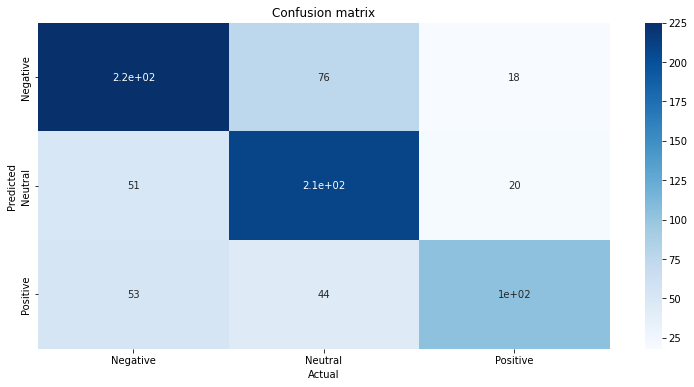

In [20]:
aux_df = df[['label','label_cat']].drop_duplicates().sort_values('label')
conf_matrix = confusion_matrix(y_test,xgbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['label_cat'].values, 
            yticklabels=aux_df['label_cat'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [23]:
d = {
     'Model': 'eXtreme Gradient Boosting Classifier',
     'Training Set Accuracy': accuracy_score(y_train, xgbc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, xgbc_pred)
}

df_models_xgbc = pd.DataFrame(d, index=[0])
df_models_xgbc

,Model,Training Set Accuracy,Test Set Accuracy
0,eXtreme Gradient Boosting Classifier,0.900312,0.6725


In [24]:
with open('../Models/best_xgbc.pickle', 'wb') as output:
    pickle.dump(xgbc, output)
    
with open('../Models/df_models_xgbc.pickle', 'wb') as output:
    pickle.dump(df_models_xgbc, output)